In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("/content/gdrive/My Drive/Admission_Predict.csv")

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.drop('Serial No.',axis=1,inplace=True)

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
df.shape

(400, 8)

In [9]:
print(df.columns.tolist())

['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


In [10]:
x=df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
x=StandardScaler().fit_transform(x)

In [13]:
x[0:5]

array([[ 1.76210664,  1.74697064,  0.79882862,  1.09386422,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862,  0.59665321,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, -0.39776881,  0.05293342,
        -1.00563118,  0.90911166],
       [ 0.4531256 ,  0.42725722, -0.07660001,  0.0994422 , -1.06145431,
         0.11933921,  0.90911166],
       [-0.24499762, -0.72749202, -0.95202863, -1.39219083, -0.50426044,
        -0.65302852, -1.09997489]])

In [14]:
y=df['Chance of Admit '].values
y[0:5]

array([0.92, 0.76, 0.72, 0.8 , 0.65])

In [15]:
for i in range(len(y)):
  if y[i]<0.5:
    y[i]=0
  else:
    y[i]=1
y[0:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

In [16]:
x=x.T

In [17]:
x.shape

(7, 400)

In [18]:
def sigmoid(z):
  s=1/(1+np.exp(-z))
  return s

In [19]:
def initwb(dim):
  w=np.zeros(shape=(dim,1))
  b=0
  return w,b

In [20]:
def propagate(w,b,x,y):
  m=x.shape[1]
  z=np.dot(w.T,x)+b
  a=sigmoid(z)
  cost=(-1/m)*np.sum(np.log(a)*y + np.log(1-a)*(1-y))
  dz=a-y
  dw=(1/m)*(np.dot(x,dz.T))
  db=(1/m)*np.sum(dz)
  grads={'dw':dw,'db':db}
  return cost,grads

In [21]:
def optimise(w,b,x,y,noofiter,learnrate):
  costs=[]
  for i in range(noofiter):
    cost,grads=propagate(w,b,x,y)
    dw=grads['dw']
    db=grads['db']
    w=w-learnrate*dw
    b=b-learnrate*db
    costs.append(cost)
  grads={'dw':dw,'db':db}
  props={'w':w,'b':b}
  return costs,grads,props

In [22]:
def predict(w,b,x):
  yhat=np.zeros(shape=(x.shape[1]))
  a=sigmoid(np.dot(w.T,x)+b)
  for i in range(a.shape[1]):
    if(a[0][i]>0.5):
      yhat[i]=1
    else:
      yhat[i]=0
  #  yhat[i]=a[0][i]
  return yhat

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
scores={}
def final(learnrate):
  w,b=initwb(x.shape[0])
  cost,grads=propagate(w,b,x,y)
  costs,grads,props=optimise(w,b,x,y,1000,learnrate)
  w=props['w']
  b=props['b']
  yhat=predict(w,b,x)
  scores[learnrate]=(accuracy_score(y,yhat))
for i in [10,1,0.1,0.01,0.001,0.001]:
  final(i)

In [25]:
print(scores)

{10: 0.905, 1: 0.9475, 0.1: 0.945, 0.01: 0.9275, 0.001: 0.8975}


In [31]:
w,b=initwb(x.shape[0])
cost,grads=propagate(w,b,x,y)
costs,grads,props=optimise(w,b,x,y,100,1)
w=props['w']
b=props['b']
yhat=predict(w,b,x)

In [32]:
accuracy_score(y,yhat)

0.945

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

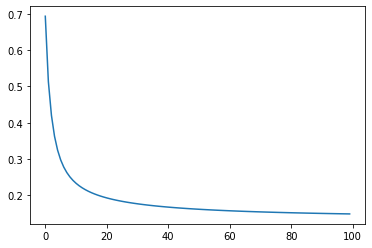

In [36]:
plt.plot(costs)
plt.show()

In [37]:
from sklearn.linear_model import LogisticRegression

#Cross checking with preloaded libraries

In [38]:
lr=LogisticRegression()

In [42]:
lr.fit(x.T,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
yhat=lr.predict(x.T)

In [45]:
accuracy_score(y,yhat)

0.9475